<a href="https://colab.research.google.com/github/dhan0474-gif/EDA-Agriculture-Project/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Crop    District  Season  Rainfall_mm  Area_hectare  \
0      Maize       Salem    Rabi          860      6.349563   
1  Sugarcane  Coimbatore  Summer         1168      4.452510   
2       Rice  Coimbatore  Kharif         1360      1.590635   
3      Maize     Madurai  Kharif          401      8.393617   
4      Maize       Salem  Kharif          512      4.346502   

   Yield_ton_per_hectare  Cost_per_hectare  Price_per_ton  Production_ton  \
0               5.106895             28970           3033       32.426547   
1               2.488140             20661           3567       11.078470   
2               4.377163             21142           1325        6.962470   
3               5.745797             27109           1476       48.228014   
4               5.504421             37010           3199       23.924975   

        Revenue     Total_Cost         Profit  
0  98349.717469  183946.832377  -85597.114908  
1  39516.902543   91993.316210  -52476.413667  
2   9225.27273

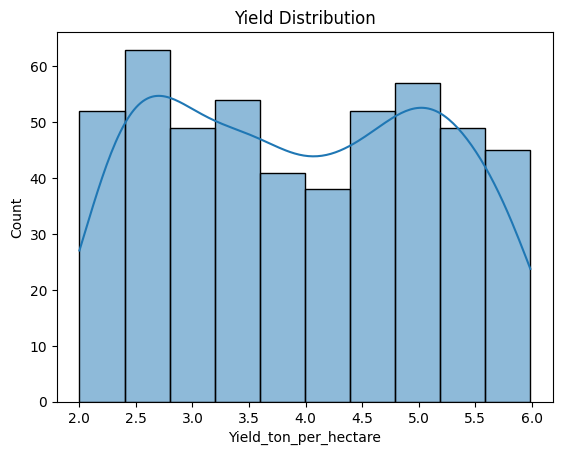

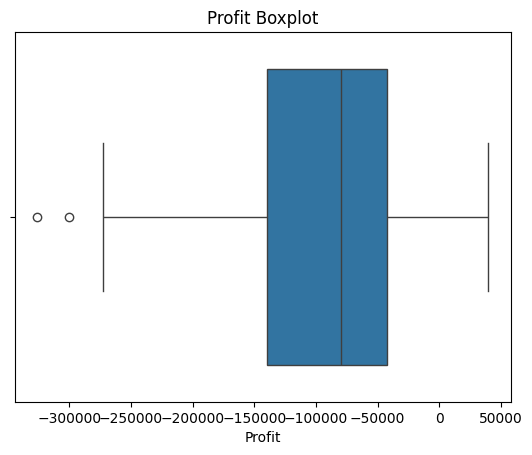

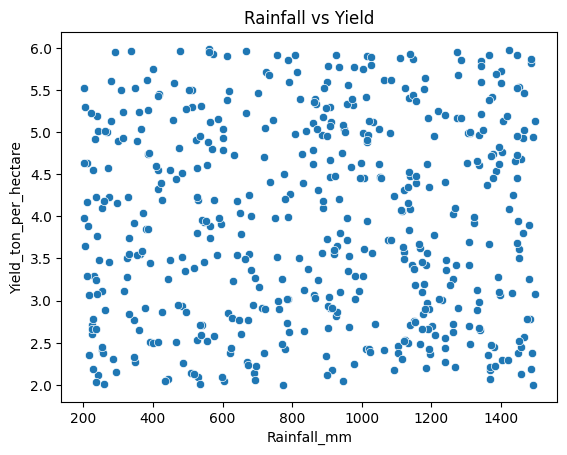

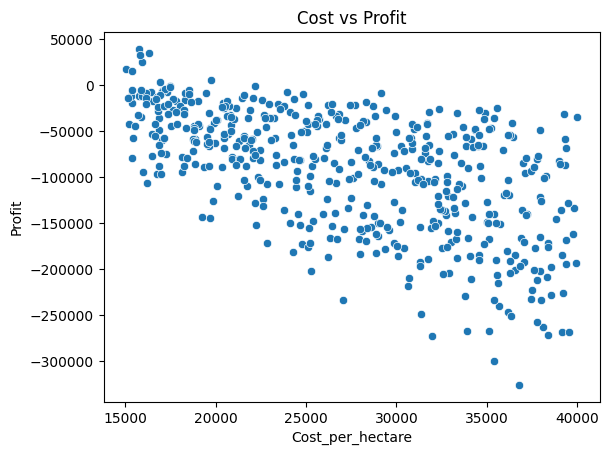

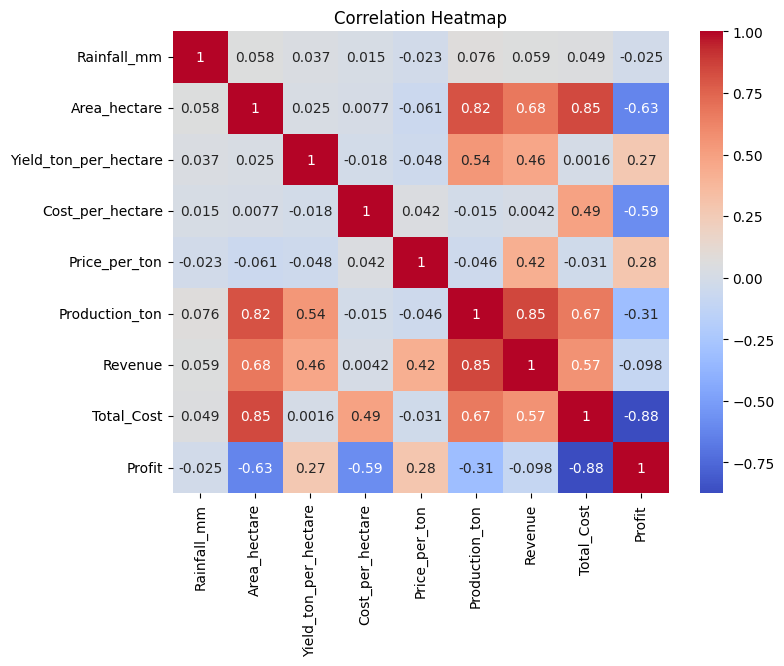

Maize
Project Completed Successfully!


In [ ]:
!pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

data = {
    "Crop": np.random.choice(["Rice", "Wheat", "Maize", "Sugarcane"], 500),
    "District": np.random.choice(["Coimbatore", "Erode", "Salem", "Madurai"], 500),
    "Season": np.random.choice(["Kharif", "Rabi", "Summer"], 500),
    "Rainfall_mm": np.random.randint(200, 1500, 500),
    "Area_hectare": np.random.uniform(1, 10, 500),
    "Yield_ton_per_hectare": np.random.uniform(2, 6, 500),
    "Cost_per_hectare": np.random.randint(15000, 40000, 500),
    "Price_per_ton": np.random.randint(1200, 4000, 500)
}

df = pd.DataFrame(data)

df["Production_ton"] = df["Yield_ton_per_hectare"] * df["Area_hectare"]
df["Revenue"] = df["Production_ton"] * df["Price_per_ton"]
df["Total_Cost"] = df["Cost_per_hectare"] * df["Area_hectare"]
df["Profit"] = df["Revenue"] - df["Total_Cost"]

print(df.head())

print(df.groupby("Crop")["Yield_ton_per_hectare"].mean())
print(df.groupby("District")["Profit"].sum())

scaler = StandardScaler()

scale_cols = ["Rainfall_mm", "Area_hectare", "Production_ton", "Profit"]

df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])

print(df_scaled[scale_cols].head())

plt.figure()
sns.histplot(df["Yield_ton_per_hectare"], kde=True)
plt.title("Yield Distribution")
plt.show()

plt.figure()
sns.boxplot(x=df["Profit"])
plt.title("Profit Boxplot")
plt.show()

plt.figure()
sns.scatterplot(x=df["Rainfall_mm"], y=df["Yield_ton_per_hectare"])
plt.title("Rainfall vs Yield")
plt.show()

plt.figure()
sns.scatterplot(x=df["Cost_per_hectare"], y=df["Profit"])
plt.title("Cost vs Profit")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

best_crop = df.groupby("Crop")["Profit"].mean().idxmax()
print(best_crop)

print("Project Completed Successfully!")